

<h1 align=center><font size = 5>GEBRU M W CAPSTONE PROJECT WEEK-2-PART-1</font></h1>

## Introduction

This Capstone's project objective is to locate and recommend to the management which borough/neighborhood of New York will be best choice to open new Ethiopian restaurant which will serve Ethiopian food for Ethiopians and other customers who love vegan food. 

### Import necessary Libraries

In [3]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
 

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import matplotlib as mpl
import matplotlib.pyplot as plt

print('Libraries imported.')

Folium installed
Libraries imported.


### Let's define Foursquare Credentials and Version

In [4]:
CLIENT_ID = 'HSTK2LBFPHI4BVOBRIGSFB4YUJQ3FAEEZNWQHLZ0JOP0TAE1' # your Foursquare ID
CLIENT_SECRET = 'LYPEWTQMGPI0CHJQMXUWFUZWJCRZLGBO0OTS0BLQ4050QAFI' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: HSTK2LBFPHI4BVOBRIGSFB4YUJQ3FAEEZNWQHLZ0JOP0TAE1
CLIENT_SECRET:LYPEWTQMGPI0CHJQMXUWFUZWJCRZLGBO0OTS0BLQ4050QAFI


#### So let's start by converting the Central New York address to its latitude and longitude coordinates.

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>foursquare_agent</em>, as shown below.

In [5]:
address = 'New York, NY'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

40.7127281 -74.0060152


## Search for a specific venue category


#### Now let's define a query to search for Ethiopian Restaurant that is within 50000 metres from the Central New York City. 

In [6]:
search_query = 'Ethiopian'
radius = 50000
print(search_query + ' .... OK!')

Ethiopian .... OK!


#### Define the corresponding URL

In [7]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=HSTK2LBFPHI4BVOBRIGSFB4YUJQ3FAEEZNWQHLZ0JOP0TAE1&client_secret=LYPEWTQMGPI0CHJQMXUWFUZWJCRZLGBO0OTS0BLQ4050QAFI&ll=40.7127281,-74.0060152&v=20180604&query=Ethiopian&radius=50000&limit=100'

#### Send the GET Request and examine the results

In [8]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d33bf8307190200250d4f20'},
 'response': {'venues': [{'id': '4a997b7ef964a520922e20e3',
    'name': 'Meskerem Ethiopian Restaurant',
    'location': {'address': '124 Macdougal St',
     'crossStreet': 'at Minetta Lane',
     'lat': 40.73006657047327,
     'lng': -74.00050784351504,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.73006657047327,
       'lng': -74.00050784351504}],
     'distance': 1985,
     'postalCode': '10012',
     'cc': 'US',
     'city': 'New York',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['124 Macdougal St (at Minetta Lane)',
      'New York, NY 10012',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d10a941735',
      'name': 'Ethiopian Restaurant',
      'pluralName': 'Ethiopian Restaurants',
      'shortName': 'Ethiopian',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/ethiopian_',
       'suffix': '.png'},
      'primary': True}],


#### Get relevant part of JSON and transform it into a *pandas* dataframe

In [9]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,delivery.id,delivery.provider.icon.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.name,delivery.url,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d10a941735', 'name': 'E...",419573,/delivery_provider_seamless_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",seamless,https://www.seamless.com/menu/meskerem-ethiopi...,False,4a997b7ef964a520922e20e3,124 Macdougal St,US,New York,United States,at Minetta Lane,1985,"[124 Macdougal St (at Minetta Lane), New York,...","[{'label': 'display', 'lat': 40.73006657047327...",40.730067,-74.000508,10012,NY,Meskerem Ethiopian Restaurant,v-1563672451,NaN
1,"[{'id': '4bf58dd8d48988d10a941735', 'name': 'E...",88765,/delivery_provider_seamless_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",seamless,https://www.seamless.com/menu/awash-ethiopian-...,False,4fbc1488e4b04e551e0c3a57,242 Court St,US,Brooklyn,United States,NaN,3160,"[242 Court St, Brooklyn, NY 11201, United States]","[{'label': 'display', 'lat': 40.68574, 'lng': ...",40.685740,-73.994393,11201,NY,Awash Ethiopian Restaurant,v-1563672451,NaN
2,"[{'id': '4bf58dd8d48988d10a941735', 'name': 'E...",NaN,NaN,NaN,NaN,NaN,NaN,False,522779fd498e916ef366c9af,182 Avenue B,US,New York,United States,11th & 12th,2807,"[182 Avenue B (11th & 12th), New York, NY 1000...","[{'label': 'display', 'lat': 40.72773222905081...",40.727732,-73.979272,10009,NY,Haile Ethiopian Cuisine,v-1563672451,NaN
3,"[{'id': '4bf58dd8d48988d10a941735', 'name': 'E...",310642,/delivery_provider_seamless_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",seamless,https://www.seamless.com/menu/bati-ethiopian-k...,False,4ac3e617f964a520599d20e3,747 Fulton St,US,Brooklyn,United States,S Portland Ave,3920,"[747 Fulton St (S Portland Ave), Brooklyn, NY ...","[{'label': 'display', 'lat': 40.686599, 'lng':...",40.686599,-73.974876,11217,NY,Bati Ethiopian Restaurant,v-1563672451,81807337
4,"[{'id': '4bf58dd8d48988d1d3941735', 'name': 'V...",NaN,NaN,NaN,NaN,NaN,NaN,False,4c0ad4b37e3fc9280a5af482,261 Irvington Ave,US,South Orange,United States,Riggs Pl,21160,"[261 Irvington Ave (Riggs Pl), South Orange, N...","[{'label': 'display', 'lat': 40.7418804, 'lng'...",40.741880,-74.253885,07079,NJ,Lalibela Ethiopian Restaurant,v-1563672451,51130599


In [10]:
dataframe.shape

(22, 24)

#### Define information of interest and filter dataframe

In [11]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Meskerem Ethiopian Restaurant,Ethiopian Restaurant,124 Macdougal St,US,New York,United States,at Minetta Lane,1985,"[124 Macdougal St (at Minetta Lane), New York,...","[{'label': 'display', 'lat': 40.73006657047327...",40.730067,-74.000508,10012,NY,4a997b7ef964a520922e20e3
1,Awash Ethiopian Restaurant,Ethiopian Restaurant,242 Court St,US,Brooklyn,United States,NaN,3160,"[242 Court St, Brooklyn, NY 11201, United States]","[{'label': 'display', 'lat': 40.68574, 'lng': ...",40.685740,-73.994393,11201,NY,4fbc1488e4b04e551e0c3a57
2,Haile Ethiopian Cuisine,Ethiopian Restaurant,182 Avenue B,US,New York,United States,11th & 12th,2807,"[182 Avenue B (11th & 12th), New York, NY 1000...","[{'label': 'display', 'lat': 40.72773222905081...",40.727732,-73.979272,10009,NY,522779fd498e916ef366c9af
3,Bati Ethiopian Restaurant,Ethiopian Restaurant,747 Fulton St,US,Brooklyn,United States,S Portland Ave,3920,"[747 Fulton St (S Portland Ave), Brooklyn, NY ...","[{'label': 'display', 'lat': 40.686599, 'lng':...",40.686599,-73.974876,11217,NY,4ac3e617f964a520599d20e3
4,Lalibela Ethiopian Restaurant,Vegetarian / Vegan Restaurant,261 Irvington Ave,US,South Orange,United States,Riggs Pl,21160,"[261 Irvington Ave (Riggs Pl), South Orange, N...","[{'label': 'display', 'lat': 40.7418804, 'lng'...",40.741880,-74.253885,07079,NJ,4c0ad4b37e3fc9280a5af482
5,Ethiopian Meskerem Restaurant,Food,164 Amsterdam Ave,US,New York,United States,NaN,7243,"[164 Amsterdam Ave, New York, NY 10023, United...","[{'label': 'display', 'lat': 40.77559, 'lng': ...",40.775590,-73.983850,10023,NY,4f32471a19836c91c7c7dcea
6,Awash,Ethiopian Restaurant,338 E 6th St,US,New York,United States,btwn 1st & 2nd Ave,2231,"[338 E 6th St (btwn 1st & 2nd Ave), New York, ...","[{'label': 'display', 'lat': 40.7265351428124,...",40.726535,-73.986842,10003,NY,49f7a827f964a520cd6c1fe3
7,Bari Ethiopian Kitchen,Ethiopian Restaurant,NaN,US,New York,United States,NaN,3916,"[New York, NY 11217, United States]","[{'label': 'display', 'lat': 40.686643, 'lng':...",40.686643,-73.974872,11217,NY,5cabfa86ad910e002cd509cd
8,Mulu Baltena Ethiopian Cafe,Ethiopian Restaurant,999 Bergen Ave,US,Jersey City,United States,NaN,5341,"[999 Bergen Ave, Jersey City, NJ 07306, United...","[{'label': 'display', 'lat': 40.73022, 'lng': ...",40.730220,-74.064976,07306,NJ,4e4cf8a5bd413c4cc66da583
9,Ethiopian Airlines ET509,Plane,NaN,US,Newark,United States,NaN,14309,"[Newark, NJ 07114, United States]","[{'label': 'display', 'lat': 40.691855, 'lng':...",40.691855,-74.173325,07114,NJ,5bdf92801ffe97002c0fb558


#### Let's visualize the Ethiopian restaurants that are nearby

In [12]:
dataframe_filtered.name

0     Meskerem Ethiopian Restaurant
1        Awash Ethiopian Restaurant
2           Haile Ethiopian Cuisine
3         Bati Ethiopian Restaurant
4     Lalibela Ethiopian Restaurant
5     Ethiopian Meskerem Restaurant
6                             Awash
7            Bari Ethiopian Kitchen
8       Mulu Baltena Ethiopian Cafe
9          Ethiopian Airlines ET509
10                        Horus Too
11         Dashen ethiopian cuisine
12                            Meske
13       Mesob Ethiopian Restaurant
14        Nile Ethiopian Restaurant
15    Abyssina Ethiopian Restaurant
16                            Awash
17      dopestEthiopian Productions
18       Walia Ethiopian Restaurant
19                      Harrar Cafe
20               Lalibela Ethiopian
21      Lalibela Ethiopian Cusinine
Name: name, dtype: object

In [13]:
filtered_columns_2 = ['name', 'location.city']
dataframe_filtered_2 = dataframe.loc[:, filtered_columns_2]

dataframe_filtered_2 


,name,location.city
0,Meskerem Ethiopian Restaurant,New York
1,Awash Ethiopian Restaurant,Brooklyn
2,Haile Ethiopian Cuisine,New York
3,Bati Ethiopian Restaurant,Brooklyn
4,Lalibela Ethiopian Restaurant,South Orange
5,Ethiopian Meskerem Restaurant,New York
6,Awash,New York
7,Bari Ethiopian Kitchen,New York
8,Mulu Baltena Ethiopian Cafe,Jersey City
9,Ethiopian Airlines ET509,Newark


In [14]:
dataframe_filtered_2_unique = dataframe_filtered_2['location.city'].unique()
dataframe_filtered_2_unique

array(['New York', 'Brooklyn', 'South Orange', 'Jersey City', 'Newark',
       'New Brunswick', 'Montclair', 'Mount Kisco', 'Chappaqua'],
      dtype=object)

In [15]:
# Let us drop those ethiopian restaurants which are out of the five New York Boroughs and those duplicate Restaurants
dataframe_filtered_2 = dataframe_filtered_2.drop([4,8,9,10,11,13,16,17,18,19,20,21], axis=0)
dataframe_filtered_2 = dataframe_filtered_2.reset_index(drop = True)
dataframe_filtered_2

,name,location.city
0,Meskerem Ethiopian Restaurant,New York
1,Awash Ethiopian Restaurant,Brooklyn
2,Haile Ethiopian Cuisine,New York
3,Bati Ethiopian Restaurant,Brooklyn
4,Ethiopian Meskerem Restaurant,New York
5,Awash,New York
6,Bari Ethiopian Kitchen,New York
7,Meske,New York
8,Nile Ethiopian Restaurant,New York
9,Abyssina Ethiopian Restaurant,New York


In [16]:
dataframe_filtered_2.shape

(10, 2)

In [17]:
# Now let's group the restaurants based on their Boroughs
dataframe_filtered_3_grouped = dataframe_filtered_2.groupby('location.city').count()
dataframe_filtered_3_grouped

,name
location.city,
Brooklyn,2
New York,8


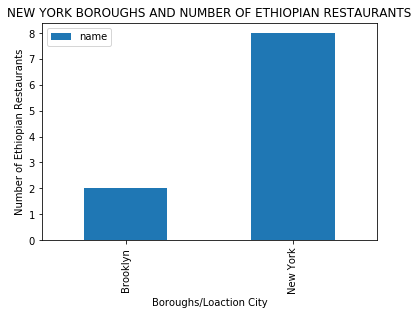

In [18]:
dataframe_filtered_3_grouped = dataframe_filtered_3_grouped
dataframe_filtered_3_grouped.plot(kind='bar')
plt.title('NEW YORK BOROUGHS AND NUMBER OF ETHIOPIAN RESTAURANTS')
plt.xlabel('Boroughs/Loaction City')
plt.ylabel('Number of Ethiopian Restaurants')

plt.show()

### Brooklyn seem to have the least number of Ethiopian Restaurants compared to Manhattan(New York). The rest of Boroughs do not have any Ethiopian Restaurants, most likely because there is no big Ethiopian community customers. So we will avoid the other Boroughs to minimize associated risk and focus on Brooklyn.

In [19]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=11) # generate map centred around New York
# add a red circle marker to represent the Central New York
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='New York',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Ethiopian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

## Download and Explore Dataset for New York

New York has a total of 5 boroughs and 306 neighborhoods. In order to segement the neighborhoods and explore them, I need a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood.

Luckily, this dataset exists for free on the web and  is the following is the link to the dataset: 
https://geo.nyu.edu/catalog/nyu_2451_34572

For My convenience, I will downloaded  and use the files  from Watson and simply run a `wget` command and access the data. 

In [20]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


<a id="item2"></a>

#### Load and explore the data

Next, let's load the data.

In [21]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [22]:
neighborhoods_data = newyork_data['features']

Let's take a look at the first item in this list.

In [23]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

###  Tranform the data into a pandas dataframe

In [24]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

Then let's loop through the data and fill the dataframe one row at a time

In [25]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

Quickly examine the resulting dataframe.

In [26]:
neighborhoods.head(10)

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
6,Manhattan,Marble Hill,40.876551,-73.910660
7,Bronx,Woodlawn,40.898273,-73.867315
8,Bronx,Norwood,40.877224,-73.879391
9,Bronx,Williamsbridge,40.881039,-73.857446


In [27]:
Boroughs_grouped = neighborhoods.groupby('Borough').count() # grouped by Borough this will help to get the number of Eth restaurants in each Borough

In [28]:
Boroughs_grouped

,Neighborhood,Latitude,Longitude
Borough,,,
Bronx,52,52,52
Brooklyn,70,70,70
Manhattan,40,40,40
Queens,81,81,81
Staten Island,63,63,63


And now let's make sure that the dataset has all 5 boroughs and 306 neighborhoods.

In [29]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [30]:
Brooklyn_data = neighborhoods[neighborhoods['Borough'] == 'Brooklyn'].reset_index(drop=True)
Brooklyn_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Brooklyn,Bay Ridge,40.625801,-74.030621
1,Brooklyn,Bensonhurst,40.611009,-73.995180
2,Brooklyn,Sunset Park,40.645103,-74.010316
3,Brooklyn,Greenpoint,40.730201,-73.954241
4,Brooklyn,Gravesend,40.595260,-73.973471


## let's simplify the above data and segment and cluster only the neighborhoods in Brooklyn. So let's slice the original dataframe and create a new dataframe of the Brooklyn data.

Let's get the geographical coordinates of Brooklyn.

In [31]:
address = 'Brooklyn, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Brooklyn are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Brooklyn are 40.6501038, -73.9495823.


let's visualizat Brooklyn the neighborhoods in it.

In [32]:
# create map of Brooklyn using latitude and longitude values
map_Brooklyn = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(Brooklyn_data['Latitude'], Brooklyn_data['Longitude'], Brooklyn_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Brooklyn)  
    
map_Brooklyn

Let's explore the first neighborhood in Brooklyn.

In [33]:
Brooklyn_data.loc[0, 'Neighborhood']

'Bay Ridge'

Get the neighborhood's latitude and longitude values.

In [34]:
neighborhood_latitude = Brooklyn_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = Brooklyn_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = Brooklyn_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Bay Ridge are 40.625801065010656, -74.03062069353813.


Let's create a function to repeat the same process to all the neighborhoods in Brooklyn get the venues

In [35]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [36]:
# let'scode to run the above function on each neighborhood and create a new dataframe called Brooklyn_venues.
Brooklyn_venues = getNearbyVenues(names=Brooklyn_data['Neighborhood'],
                                   latitudes=Brooklyn_data['Latitude'],
                                   longitudes=Brooklyn_data['Longitude']
                                  )

Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker Heights
Gerritsen Beach
Marine Park
Clinton Hill
Sea Gate
Downtown
Boerum Hill
Prospect Lefferts Gardens
Ocean Hill
City Line
Bergen Beach
Midwood
Prospect Park South
Georgetown
East Williamsburg
North Side
South Side
Ocean Parkway
Fort Hamilton
Ditmas Park
Wingate
Rugby
Remsen Village
New Lots
Paerdegat Basin
Mill Basin
Fulton Ferry
Vinegar Hill
Weeksville
Broadway Junction
Dumbo
Homecrest
Highland Park
Madison
Erasmus


In [37]:
#check the size of the resulting frame
print(Brooklyn_venues.shape)
Brooklyn_venues.head()

(2846, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bay Ridge,40.625801,-74.030621,Pilo Arts Day Spa and Salon,40.624748,-74.030591,Spa
1,Bay Ridge,40.625801,-74.030621,Bagel Boy,40.627896,-74.029335,Bagel Shop
2,Bay Ridge,40.625801,-74.030621,Cocoa Grinder,40.623967,-74.030863,Juice Bar
3,Bay Ridge,40.625801,-74.030621,Pegasus Cafe,40.623168,-74.031186,Breakfast Spot
4,Bay Ridge,40.625801,-74.030621,Ho' Brah Taco Joint,40.622960,-74.031371,Taco Place


In [38]:
# Let's check how many venues were returned for each neighborhood
Brooklyn_venues.groupby('Neighborhood').count().head(3)

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bath Beach,51,51,51,51,51,51
Bay Ridge,86,86,86,86,86,86
Bedford Stuyvesant,27,27,27,27,27,27


In [39]:
print('There are {} uniques categories.'.format(len(Brooklyn_venues['Venue Category'].unique())))

There are 281 uniques categories.


In [40]:
#Let's analyze each Neighborhood
# one hot encoding
Brooklyn_onehot = pd.get_dummies(Brooklyn_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Brooklyn_onehot['Neighborhood'] = Brooklyn_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Brooklyn_onehot.columns[-1]] + list(Brooklyn_onehot.columns[:-1])
Brooklyn_onehot = Brooklyn_onehot[fixed_columns]

Brooklyn_onehot.head()
Brooklyn_onehot.shape

(2846, 281)

In [41]:
#Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
Brooklyn_grouped = Brooklyn_onehot.groupby('Neighborhood').mean().reset_index()
Brooklyn_grouped.head(5)

,Neighborhood,Yoga Studio,Adult Boutique,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Service,Event Space,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Herbs & Spices Store,History Museum,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Non-Profit,Noodle House,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoors & Recreation,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pie Shop,Piercing Parlor,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Road,Rock Club,Roller Rink,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tibetan Restaurant,Tiki Bar,Toy / Game Store,Trail,Turkish Restaurant,Used Bookstore,Vape Store,Varenyky restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wat

In [42]:
Brooklyn_grouped.shape

(70, 281)

In [43]:
#Let's print each neighborhood along with the top 5 most common venues
num_top_venues = 5

for hood in Brooklyn_grouped['Neighborhood']:
  #  print("----"+hood+"----")
    temp = Brooklyn_grouped[Brooklyn_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
   #print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
   #print('\n')

In [44]:
#Let's put that into a pandas dataframe
#First, let's write a function to sort the venues in descending or

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [45]:
#Now let's create the new dataframe and display the top 5 venues for each neighborhood
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Brooklyn_grouped['Neighborhood']

for ind in np.arange(Brooklyn_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Brooklyn_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Bath Beach,Chinese Restaurant,Pharmacy,Women's Store,Fast Food Restaurant,Sushi Restaurant
1,Bay Ridge,Italian Restaurant,Spa,Chinese Restaurant,Pizza Place,Thai Restaurant
2,Bedford Stuyvesant,Deli / Bodega,Café,Pizza Place,Coffee Shop,Bus Stop
3,Bensonhurst,Ice Cream Shop,Donut Shop,Spa,Chinese Restaurant,Sushi Restaurant
4,Bergen Beach,Harbor / Marina,Playground,Baseball Field,Donut Shop,Park


## Cluster Neighborhoods

In [46]:
# set number of clusters
kclusters = 5

Brooklyn_grouped_clustering = Brooklyn_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Brooklyn_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 2, 2, 2, 2, 4, 2, 4, 2], dtype=int32)

In [47]:
#Let's create a new dataframe that includes the cluster as well as the top 5 venues for each neighborhood.
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Brooklyn_merged = Brooklyn_data

# merge Brooklyn_grouped with Brooklyn_data to add latitude/longitude for each neighborhood
Brooklyn_merged = Brooklyn_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Brooklyn_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Brooklyn,Bay Ridge,40.625801,-74.030621,2,Italian Restaurant,Spa,Chinese Restaurant,Pizza Place,Thai Restaurant
1,Brooklyn,Bensonhurst,40.611009,-73.995180,2,Ice Cream Shop,Donut Shop,Spa,Chinese Restaurant,Sushi Restaurant
2,Brooklyn,Sunset Park,40.645103,-74.010316,2,Bank,Bakery,Pizza Place,Latin American Restaurant,Mexican Restaurant
3,Brooklyn,Greenpoint,40.730201,-73.954241,2,Bar,Coffee Shop,Cocktail Bar,Pizza Place,Yoga Studio
4,Brooklyn,Gravesend,40.595260,-73.973471,0,Pizza Place,Bus Station,Lounge,Bakery,Baseball Field


##  let's visualize the resulting clusters

In [48]:


# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Brooklyn_merged['Latitude'], Brooklyn_merged['Longitude'], Brooklyn_merged['Neighborhood'], Brooklyn_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## ->Cluster 0 or the first cluster seems to have the most venues in Brooklyn and will be the first choice to open the new Ethiopian Restaurant.

### Thank you !
